# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<!-- <img src="pic1.png"/> -->
![alt text](pic1.png "Title")
Then you will want to run the above command:

<!-- <img src="pic2.png"/> -->
![alt text](pic2.png "Title")

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
# import sys
# !{sys.executable} -m pip install -U pandas numpy scikit-learn seaborn statsmodels xgboost matplotlib

In [2]:
from utils import *
%matplotlib inline
plt.rc('font', size=12) 

load_json_file_to_table('portfolio.json')
load_json_file_to_table('profile.json')
load_json_file_to_table('transcript.json')

Loading data from portfolio.json...
Loading data from profile.json...
Loading data from transcript.json...


In [3]:
%%time
offers = clean_offers()
transactions = clean_transcripts()
portfolio = clean_portfolio()
profile = clean_profile()

CPU times: user 1.1 s, sys: 37.1 ms, total: 1.14 s
Wall time: 1.14 s


In [4]:
"""TODO:
- (Optional) - Add exploratory visualizations. Distributions, correlation matrix to check for colinearity, scatterplot etc..
- Change age bracket to bins and use get_dummies
- Remove duplicate ID columns and drop / fix NaNs
- Change reward to binary?? (look to see if Reward only goes with one type of offer)
- Input / Normalize / standarize numeric features
- Join all the datasets"""
print('Offers:\n'); display(offers.sample(5))
print('Transactions:\n'); display(transactions.sample(5))
print('Portfolio:\n'); display(portfolio.sample(5))
print('Profile:\n'); display(profile.sample(5))

Offers:



,person,offer_id,time,event__offer completed,event__offer received,event__offer viewed
95468,32a45fc1352648bdb09bc156646d1bc1,f19421c1d4aa40978ebb69ca19b0e20d,408,0,0,1
56650,db7093f9994f438ba01ffdc8f70b69e0,5a8bc65990b245e5a138643cd4eb9837,336,0,1,0
65130,6c3846ea64974f65bfa6611706e769a5,2298d6c36e964ae4a3e7e9706d1fb8c2,336,0,1,0
162696,d0e43d2aa85648a6b84ab731105bc2b5,0b1e1539f2cc45b7b9fa7c272da2e1d7,630,1,0,0
82597,4300a41fca2143a38b46941de668f6d6,0b1e1539f2cc45b7b9fa7c272da2e1d7,408,0,1,0


Transactions:



,person,amount,time
44547,5bd7a2745d0641d89d174521080558eb,0.27,264
83688,7d074f93492e43e6aa923e6516b449ab,4.65,462
47437,e5747aa5f9cd4079ba6d76cbd0b9363c,18.88,282
86998,bcfbadce76f34099a68a10adc7f86c3b,31.09,480
28466,202089fa67c3493fb14b0d882713b9bd,11.69,180


Portfolio:



,reward,difficulty,duration,id,email,mobile,social,web,offer_type__bogo,offer_type__discount,offer_type__informational
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0


Profile:



,gender,age,id,became_member_on,income,age_by_decade
5953,O,38,baa224e7738d490abb3e523842a95e14,2018-03-18,37000,3
16018,M,60,66e315fee08a48aa858187a93887b3cc,2015-10-05,65000,6
9412,M,41,8da7dbbe9db544c994ef7ee31cfadd60,2016-11-25,58000,4
11511,O,55,24e1795cb9894e078644210adf514d18,2018-03-15,79000,5
1713,M,37,84f75d1db57648e5a2de3dcc4a4ab3b6,2017-11-13,56000,3


<AxesSubplot:xlabel='became_member_on'>

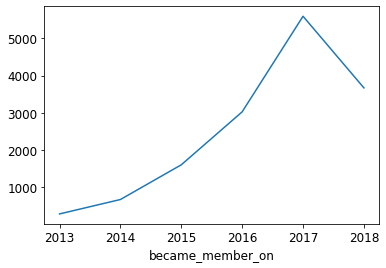

In [5]:
profile.groupby(profile.became_member_on.dt.year).count()['age'].plot()

In [6]:
# for c in list(transcript):
#     print(transcript.isnull().sum())
print('Total rows:', len(profile), len(offers), len(transactions))
sep = '\n'+'*'*60 + '\n'
# print(f'{sep}Transcript % NULLs:{sep}{transcript.isnull().sum()/len(transcript)}')
print(f'{sep}Offers % NULLs:{sep}{offers.isnull().sum()/len(offers)}')
print(f'{sep}Transactions % NULLs:{sep}{transactions.isnull().sum()/len(transactions)}')
print(f'{sep}Profile % NULLs:{sep}{profile.isnull().sum()/len(profile)}')
print(f'{sep}Portfolio % NULLs:{sep}{portfolio.isnull().sum()/len(portfolio)}')

Total rows: 14825 167581 138953

************************************************************
Offers % NULLs:
************************************************************
person                    0.0
offer_id                  0.0
time                      0.0
event__offer completed    0.0
event__offer received     0.0
event__offer viewed       0.0
dtype: float64

************************************************************
Transactions % NULLs:
************************************************************
person    0.0
amount    0.0
time      0.0
dtype: float64

************************************************************
Profile % NULLs:
************************************************************
gender              0.0
age                 0.0
id                  0.0
became_member_on    0.0
income              0.0
age_by_decade       0.0
dtype: float64

************************************************************
Portfolio % NULLs:
****************************************************

In [7]:
joined = merge_datasets(offers, transactions, portfolio, profile)

In [8]:
print('Total:', len(joined))
print(f'{sep}Joined % NULLs:{sep}{joined.isnull().sum()/len(joined)}')
'''Dropping since theres less than 20% of rows with missing records'''
joined = joined.dropna()

Total: 146188

************************************************************
Joined % NULLs:
************************************************************
offer_person_id              0.0
offer_id                     0.0
time                         0.0
event__offer completed       0.0
event__offer received        0.0
event__offer viewed          0.0
gender                       0.0
age                          0.0
profile_person_id            0.0
became_member_on             0.0
income                       0.0
age_by_decade                0.0
portfolio_id                 0.0
reward                       0.0
difficulty                   0.0
duration                     0.0
email                        0.0
mobile                       0.0
social                       0.0
web                          0.0
offer_type__bogo             0.0
offer_type__discount         0.0
offer_type__informational    0.0
person                       0.0
amount                       0.0
dtype: float64


In [9]:
print(f'{sep}Correlations:{sep}')
pd.DataFrame([(*sorted([k.capitalize(), c.capitalize()]), v[c])
                     for k,v in joined.corr().items() 
                     for c in list(v.index)
        if not k == c and v[c] > .5],
            columns=['ROW','COL','CORRELATION']
            ).drop_duplicates()


************************************************************
Correlations:
************************************************************



,ROW,COL,CORRELATION
0,Age,Age_by_decade,0.986144
2,Offer_type__bogo,Reward,0.797155
3,Difficulty,Duration,0.766105
4,Difficulty,Offer_type__discount,0.541881
6,Duration,Offer_type__discount,0.731009


In [10]:
%%time
joined = clean_merged_dataset(joined)

CPU times: user 2.33 s, sys: 23.6 ms, total: 2.35 s
Wall time: 2.35 s


In [11]:
joined.describe()

,event__offer completed,event__offer received,event__offer viewed,income,age_by_decade,difficulty,duration,email,mobile,social,web,offer_type__bogo,offer_type__discount,offer_type__informational,amount,days_as_customer,became_member_dayofweek,became_member_month,became_member_year
count,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.0,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000,146188.000000
mean,0.221933,0.444770,0.333297,66282.731825,5.021609,7.892454,6.626351,1.0,0.917435,0.659329,0.806592,0.429584,0.418776,0.151640,16.255038,1488.895758,3.030741,6.712247,2016.560190
std,0.415548,0.496942,0.471393,21512.940879,1.749834,5.033671,2.131765,0.0,0.275224,0.473936,0.394972,0.495018,0.493360,0.358673,16.567522,415.807979,2.005154,3.498085,1.186961
min,0.000000,0.000000,0.000000,30000.000000,1.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,945.000000,0.000000,1.000000,2013.000000
25%,0.000000,0.000000,0.000000,50000.000000,4.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.868571,1169.000000,1.000000,4.000000,2016.000000
50%,0.000000,0.000000,0.000000,65000.000000,5.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.368750,1351.000000,3.000000,7.000000,2017.000000
75%,0.000000,1.000000,1.000000,81000.000000,6.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,21.994000,1767.000000,5.000000,10.000000,2017.000000
max,1.000000,1.000000,1.000000,120000.000000,10.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,451.470000,2768.000000,6.000000,12.000000,2018.000000


In [12]:
joined.sample(5)

,offer_person_id,offer_id,event__offer completed,event__offer received,event__offer viewed,gender,profile_person_id,income,age_by_decade,portfolio_id,...,web,offer_type__bogo,offer_type__discount,offer_type__informational,person,amount,days_as_customer,became_member_dayofweek,became_member_month,became_member_year
124299,59fbfecd71ad41e08c10707d9855b104,f19421c1d4aa40978ebb69ca19b0e20d,0,0,1,M,59fbfecd71ad41e08c10707d9855b104,66000,6,f19421c1d4aa40978ebb69ca19b0e20d,...,1,1,0,0,59fbfecd71ad41e08c10707d9855b104,18.833333,1125,5,1,2018
83059,ccfba2843e944de0aadd187c61cd2774,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,M,ccfba2843e944de0aadd187c61cd2774,57000,8,f19421c1d4aa40978ebb69ca19b0e20d,...,1,1,0,0,ccfba2843e944de0aadd187c61cd2774,2.740000,1823,0,2,2016
33167,884a4f84900746388eac0d67a194ab27,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,M,884a4f84900746388eac0d67a194ab27,69000,2,f19421c1d4aa40978ebb69ca19b0e20d,...,1,1,0,0,884a4f84900746388eac0d67a194ab27,15.792500,1525,4,12,2016
45898,4acdbe18bbbc467b804ca376ac74e0a1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,M,4acdbe18bbbc467b804ca376ac74e0a1,64000,3,9b98b8c7a33c4b65b9aebfe6a799e6d9,...,1,1,0,0,4acdbe18bbbc467b804ca376ac74e0a1,5.671667,1212,2,11,2017
79342,dd017e813a984dc5b26bbab0a94ff533,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,F,dd017e813a984dc5b26bbab0a94ff533,55000,5,f19421c1d4aa40978ebb69ca19b0e20d,...,1,1,0,0,dd017e813a984dc5b26bbab0a94ff533,11.637500,1031,1,5,2018


INCOME:


<AxesSubplot:ylabel='Density'>

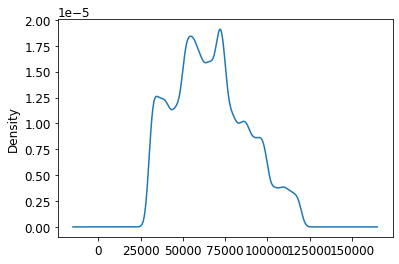

In [13]:
print('INCOME:')
joined.income.plot.kde()

AGE:


<AxesSubplot:>

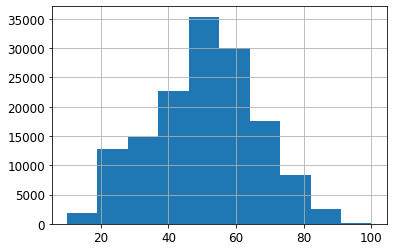

In [14]:
print('AGE:')
joined.age_by_decade.apply(lambda x: x*10).hist()

DAYS AS CUSTOMER:


<AxesSubplot:ylabel='Density'>

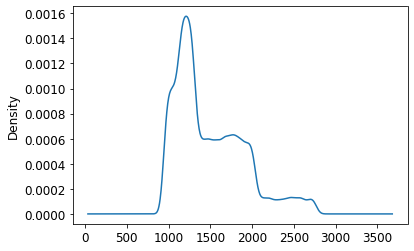

In [15]:
print('DAYS AS CUSTOMER:')
joined.days_as_customer.plot.kde()

GENDER


<AxesSubplot:>

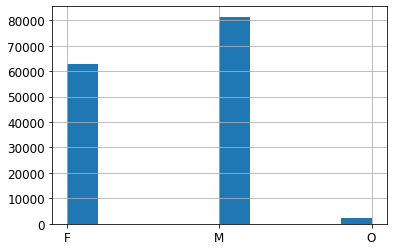

In [16]:
print('GENDER')
joined.gender.hist()

In [17]:
joined.dtypes

offer_person_id                object
offer_id                       object
event__offer completed          uint8
event__offer received           uint8
event__offer viewed             uint8
gender                       category
profile_person_id              object
income                          int64
age_by_decade                   int64
portfolio_id                   object
difficulty                      int64
duration                        int64
email                           uint8
mobile                          uint8
social                          uint8
web                             uint8
offer_type__bogo                uint8
offer_type__discount            uint8
offer_type__informational       uint8
person                         object
amount                        float64
days_as_customer                int64
became_member_dayofweek         int64
became_member_month             int64
became_member_year              int64
dtype: object

In [18]:
features_log_minmax_transform = scale_features(joined)
display(features_log_minmax_transform.head(n = 5))

,event__offer completed,event__offer received,event__offer viewed,gender,income,age_by_decade,difficulty,duration,email,mobile,...,web,offer_type__bogo,offer_type__discount,offer_type__informational,person,amount,days_as_customer,became_member_dayofweek,became_member_month,became_member_year
0,0,1,0,F,100000,7,5,7,1,1,...,1,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,0.050082,1388,1,5,2017
1,0,0,1,F,100000,7,5,7,1,1,...,1,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,0.050082,1388,1,5,2017
2,1,0,0,F,100000,7,5,7,1,1,...,1,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,0.050082,1388,1,5,2017
3,0,1,0,F,100000,7,0,3,1,1,...,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,0.050082,1388,1,5,2017
4,0,0,1,F,100000,7,0,3,1,1,...,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,0.050082,1388,1,5,2017


In [19]:
features, y = clean_and_prep_features(scale_features(joined), print_vif=False)
exclusions = ['gender',
#               'event__offer received', 'event__offer viewed', 'person'
             ]
X_train, X_test, y_train, y_test = split_and_resample(features.drop(columns=exclusions), y)
VIF(X_train.dropna())

# Show the results of the split
print("\nTraining set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

0    90946
1    90946
Name: event__offer completed, dtype: int64

,variables,VIF
14,days_as_customer,2204.154981
16,became_member_month,149.815656
17,became_member_year,2391.385699


Variables to drop with high VIF values: ['days_as_customer', 'became_member_month', 'became_member_year']

Training set has 181892 samples.
Testing set has 29238 samples.


In [20]:
%%time
"""Adapted from:
https://scikit-learn.org/
stable/auto_examples/classification/plot_classifier_comparison.html
"""

features, y = clean_and_prep_features(scale_features(joined), print_vif=False)
X_train, X_test, y_train, y_test = split_and_resample(
    features.drop(columns=['gender' #, 'event__offer received', 'event__offer viewed'
                          ]).dropna(), y)

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    xgb.XGBClassifier(),
    LogisticRegression(solver='lbfgs')
]

results_df = pd.DataFrame(columns=['Model','Metric', 'Score'])
for model in classifiers:
    start = time()
    print(f'\033[1m{model.__class__.__name__}\033[0m')
    results_df = pd.concat([results_df, train_and_plot(model, X_train, y_train, X_test, y_test, show_plots=False)])
    print(f"--- {time() - start} seconds ---")

pd.set_option('display.max_rows', 500)
results_df

0    90946
1    90946
Name: event__offer completed, dtype: int64

DecisionTreeClassifier
--- 0.5384571552276611 seconds ---
RandomForestClassifier
--- 1.2269628047943115 seconds ---
AdaBoostClassifier
--- 13.019209146499634 seconds ---
GaussianNB
--- 0.48972487449645996 seconds ---
XGBClassifier
[17:44:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:44:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--- 3.9341611862182617 seconds ---
LogisticRegression
--- 1.6855239868164062 seconds ---
CPU times: user 1min 18s, sys: 1.77 s, total: 1min 20s
Wall time: 21.1 s


,Model,Metric,Score,Training_time
0,DecisionTreeClassifier,model_score,1.000000,0.399581
1,DecisionTreeClassifier,acc_train,1.000000,0.399581
2,DecisionTreeClassifier,acc_test,1.000000,0.399581
3,DecisionTreeClassifier,f_train,1.000000,0.399581
4,DecisionTreeClassifier,f_test,1.000000,0.399581
5,DecisionTreeClassifier,precision_train,1.000000,0.399581
6,DecisionTreeClassifier,precision_test,1.000000,0.399581
7,DecisionTreeClassifier,recall_train,1.000000,0.399581
8,DecisionTreeClassifier,recall_test,1.000000,0.399581
9,DecisionTreeClassifier,f1_train,1.000000,0.399581


In [21]:
results_df.sort_values(by='Score', ascending=False).query("Metric == 'ROC AUC'")

,Model,Metric,Score,Training_time
12,AdaBoostClassifier,ROC AUC,1.000000,12.777018
12,XGBClassifier,ROC AUC,1.000000,3.766083
12,DecisionTreeClassifier,ROC AUC,1.000000,0.399581
12,RandomForestClassifier,ROC AUC,0.980594,1.082953
12,GaussianNB,ROC AUC,0.950106,0.319354
12,LogisticRegression,ROC AUC,0.645353,1.499212


,precision,recall,f1-score,support
0,0.992838,0.808711,0.891365,22798.000000
1,0.591207,0.979348,0.737316,6440.000000
accuracy,0.846296,0.846296,0.846296,0.846296
macro avg,0.792023,0.894030,0.814341,29238.000000
weighted avg,0.904374,0.846296,0.857434,29238.000000


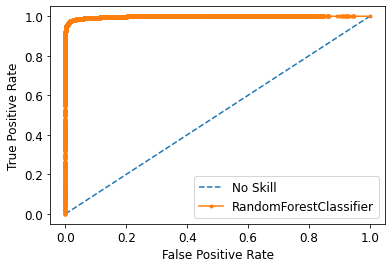

,Model,Metric,Score,Training_time
0,RandomForestClassifier,model_score,0.919488,1.024766
1,RandomForestClassifier,acc_train,0.894976,1.024766
2,RandomForestClassifier,acc_test,0.846296,1.024766
3,RandomForestClassifier,f_train,0.862475,1.024766
4,RandomForestClassifier,f_test,0.642104,1.024766
5,RandomForestClassifier,precision_train,0.906885,1.024766
6,RandomForestClassifier,precision_test,0.792023,1.024766
7,RandomForestClassifier,recall_train,0.894976,1.024766
8,RandomForestClassifier,recall_test,0.894030,1.024766
9,RandomForestClassifier,f1_train,0.894202,1.024766


In [22]:
train_and_plot(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               X_train, y_train, X_test, y_test)


,precision,recall,f1-score,support
0,0.993204,0.538468,0.698333,22798.000000
1,0.376585,0.986957,0.545158,6440.000000
accuracy,0.637253,0.637253,0.637253,0.637253
macro avg,0.684894,0.762712,0.621746,29238.000000
weighted avg,0.857387,0.637253,0.664595,29238.000000


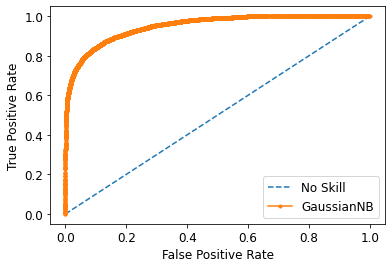

,Model,Metric,Score,Training_time
0,GaussianNB,model_score,0.637253,0.329214
1,GaussianNB,acc_train,0.763332,0.329214
2,GaussianNB,acc_test,0.637253,0.329214
3,GaussianNB,f_train,0.726837,0.329214
4,GaussianNB,f_test,0.429738,0.329214
5,GaussianNB,precision_train,0.829440,0.329214
6,GaussianNB,precision_test,0.684894,0.329214
7,GaussianNB,recall_train,0.763332,0.329214
8,GaussianNB,recall_test,0.762712,0.329214
9,GaussianNB,f1_train,0.750832,0.329214


In [23]:
train_and_plot(GaussianNB(), X_train, y_train, X_test, y_test)


Feature ranking:
1. event__offer received (0.052445)
2. event__offer viewed (0.020569)
3. amount (0.007709)
4. gender (0.006307)
5. became_member_month (0.005739)
6. income (0.002100)
7. days_as_customer (0.000171)
8. became_member_dayofweek (0.000096)
9. social (0.000034)
10. offer_type__informational (0.000027)
11. duration (0.000000)
12. mobile (-0.000144)
13. email (-0.000698)
14. offer_type__bogo (-0.002394)
15. web (-0.004200)
16. offer_type__discount (-0.032841)
17. difficulty (-0.038669)
18. age_by_decade (-0.048143)


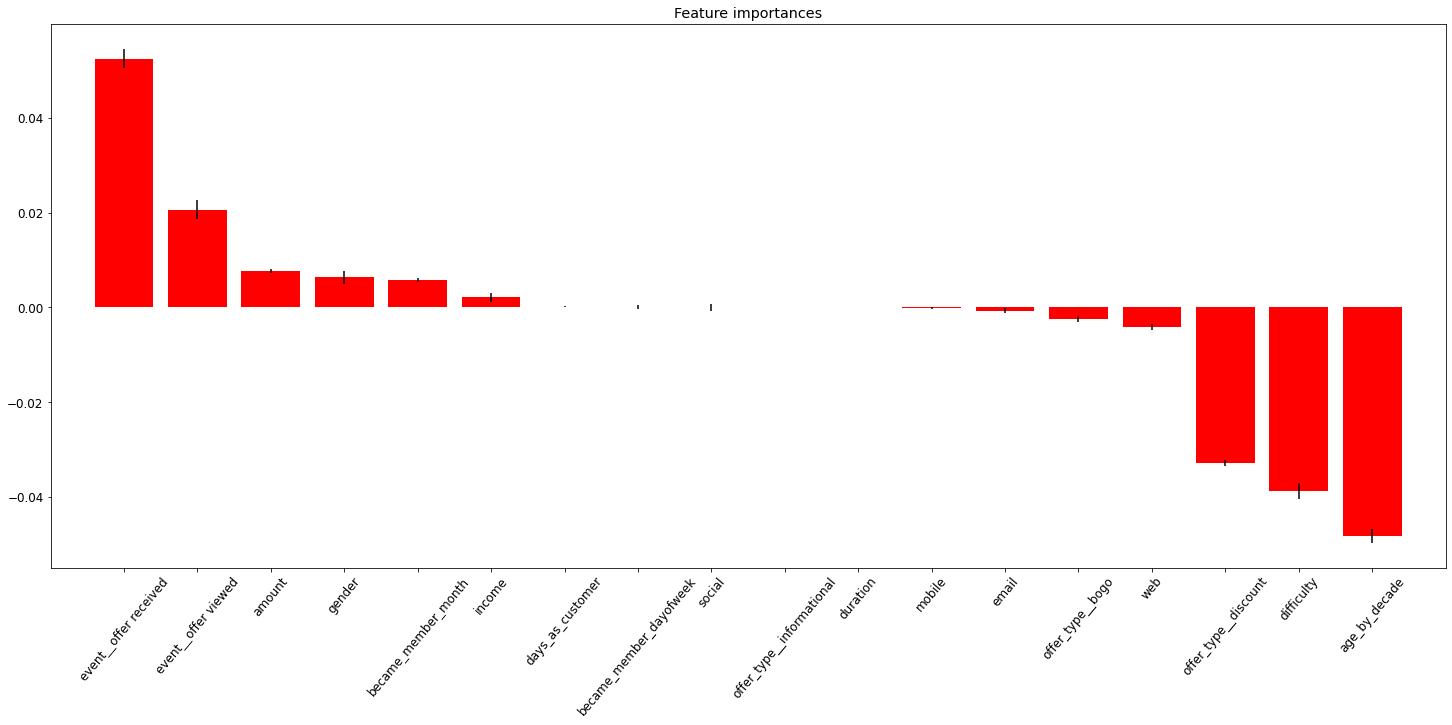

In [26]:
"""
Example adapted from:
https://inblog.in/Feature-Importance-in-Naive-Bayes-Classifiers-5qob5d5sFW
"""
nb = GaussianNB()
nb.fit(X_train, y_train)
imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

feat_list = list(features.columns)
# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_list[indices[f]], importances[indices[f]]))
    

plt.figure(figsize=(25, 10))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [feat_list[indices[i]] for i in range(0, len(feat_list) - 1)], rotation=50)
plt.xlim([-1, X_test.shape[1]])
plt.show()    

In [27]:
with open('model.pkl', 'wb') as f:
    pickle.dump(nb, f, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
xt = X_test.copy()
xt['predicted'] = nb.predict(X_test)
xt = xt.merge(y_test, how='inner', left_index=True, right_index=True).rename(columns= {'event__offer completed':'actual'})
xt
print('Not matched:', len(xt[xt.predicted != xt.actual]))
print('Matched:', len(xt[xt.predicted == xt.actual]))

Not matched: 10606
Matched: 18632


# SUMMARY OF STEPS

## Issues:
- Multicolinearity - VIF scores
- Class Imbalance Issues - Resampling
- Datasets containing multiple entities (offers/transcripts)

## Cleaning and Feature engineering:
- Engineering new features for age, gender, channels, dateparts, etc..
- Removing columns

## Evaluation:
- Comparison of multiple classification algorithsm using multiple classification metrics, classification reports, plots, and output dataframes.
- Grid search on chosen algorithm

# DISCUSSION
The classification model would likely be of minimal value if deployed in an app - predicting that a given customer will fulfill a offer doesn't make it more likely to happen to or create additional value for the organization.

However, it may be useful for modeling real world customer lifecycles. It possible that this model could be used for marketing purposes. For example, if there are a number of important variables that can be manipulated by the organization or a group of people that can be targeted to increase customer conversion then it may be able to provide actual, measurable value.

One caveat here is that further causal inference needs to be exercised for which this model wouldn't necessarily be the best. A multiple regression model, A/B testing, and statistical inference techniques in general would be much better. Prediction and causality are two separate problem spaces.

In [29]:
import json
"""Creating example json input file"""
d = json.loads(X_test.head(n=1).to_json())

for k,v in d.items():
    d[k] = list(v.values())[0]

open('example.json', 'w+').write(json.dumps(d))    

386

In [42]:
profile = to_df('select * from profile')
profile.age = profile.age.astype(int)

In [44]:
profile.gender = profile.gender.map({'M': 1, 'F': 2, 'O': 3, None:3})

In [45]:
profile.gender.unique()

array([3, 2, 1])